# Análise e Modelagem de Preços de Imóveis

## Carregamento dos Dados

In [1]:
import pandas as pd

# Carregando o dataset
data = pd.read_csv('gtp_analysis.csv')
data.head()

,nome,preco,quartos,garagem,area,banheiros,condominio,link,tipo,bairro,latitude,longitude,regiao
0,"Vendo apartamento MRV (rio amazonas 1º andar, ...",180000.0,2,1,50,1,205.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Centro,-20.811819,-49.380169,Centro
1,Apartamento para venda em Jardim Santa Lúcia d...,150000.0,2,1,56,1,220.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Jardim Santa Lúcia,-20.799167,-49.404038,Cidade das Crianças
2,Apartamento para venda em Centenário Da Emanci...,140000.0,2,1,52,2,0.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Centenário da Emancipação,-20.763314,-49.381182,CEU
3,Apartamento para venda em Jardim Yolanda de 48...,170000.0,2,1,48,1,240.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Jardim Yolanda,-20.803619,-49.348818,Represa
4,Apartamento para venda em Eldorado de 60.00m² ...,128000.0,2,1,60,1,0.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Eldorado,-20.790599,-49.403592,Cidade das Crianças


## Análise Exploratória

In [2]:

# Visualizando informações básicas do dataset
data.info()

# Estatísticas descritivas
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39860 entries, 0 to 39859
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nome        39860 non-null  object 
 1   preco       39860 non-null  float64
 2   quartos     39860 non-null  int64  
 3   garagem     39860 non-null  int64  
 4   area        39860 non-null  int64  
 5   banheiros   39860 non-null  int64  
 6   condominio  39860 non-null  float64
 7   link        39860 non-null  object 
 8   tipo        39860 non-null  object 
 9   bairro      39860 non-null  object 
 10  latitude    39860 non-null  float64
 11  longitude   39860 non-null  float64
 12  regiao      39860 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 4.0+ MB


,preco,quartos,garagem,area,banheiros,condominio,latitude,longitude
count,3.986000e+04,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000
mean,8.864006e+05,2.818741,2.468339,201.524611,2.859784,205.858986,-20.812775,-49.374758
std,9.908511e+05,0.750246,1.274855,2359.167968,1.426800,250.489755,0.026336,0.029862
min,1.500000e+04,1.000000,1.000000,10.000000,1.000000,0.000000,-20.895347,-49.455418
25%,2.900000e+05,2.000000,1.000000,80.000000,2.000000,0.000000,-20.830317,-49.394625
50%,5.000000e+05,3.000000,2.000000,140.000000,3.000000,1.800000,-20.811819,-49.379740
75%,1.150000e+06,3.000000,4.000000,225.000000,4.000000,380.000000,-20.798931,-49.348818
max,1.700000e+07,5.000000,5.000000,276161.000000,5.000000,995.000000,-20.707072,-49.293016


### Visualização de Dados

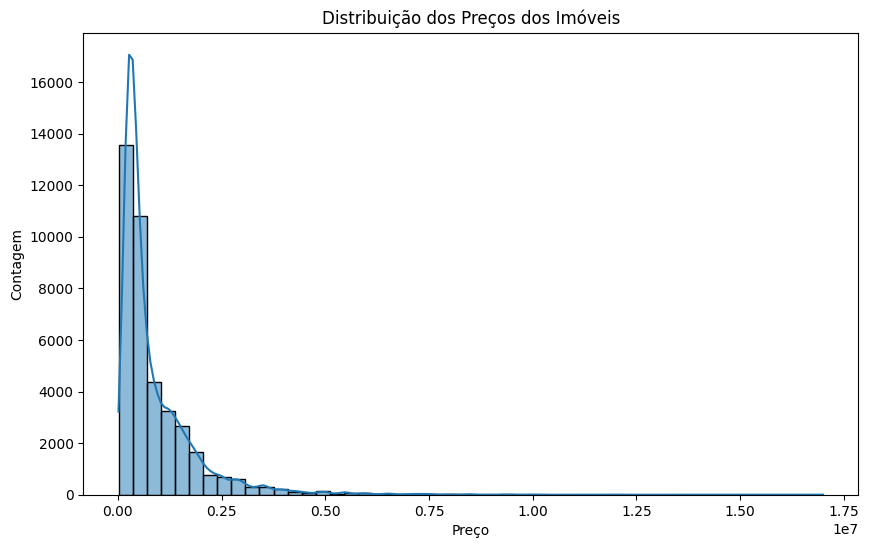

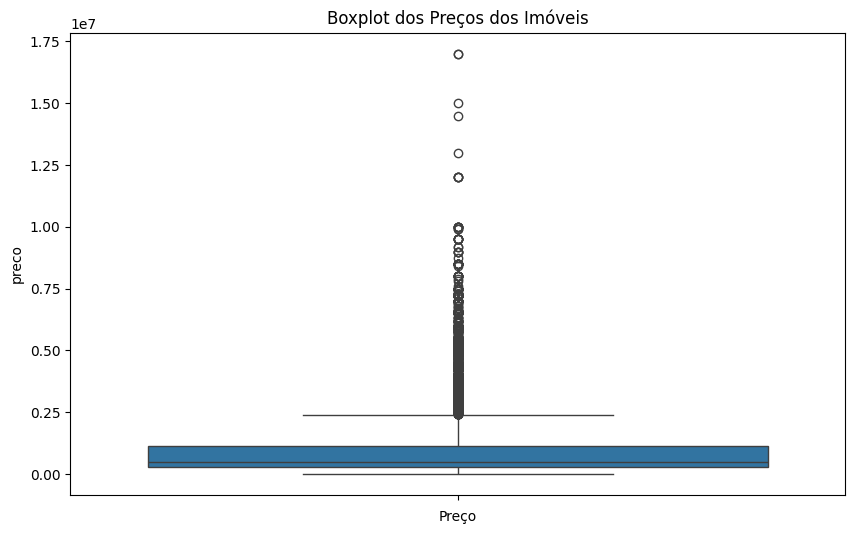

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histograma dos preços
plt.figure(figsize=(10, 6))
sns.histplot(data['preco'], bins=50, kde=True)
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()

# Boxplot dos preços para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['preco'])
plt.title('Boxplot dos Preços dos Imóveis')
plt.xlabel('Preço')
plt.show()


## Remoção de Outliers

In [4]:

# Calculando o IQR para a coluna 'preco'
Q1 = data['preco'].quantile(0.25)
Q3 = data['preco'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites inferior e superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrando o dataset para remover outliers
data_cleaned = data[(data['preco'] >= lower_limit) & (data['preco'] <= upper_limit)]

# Verificando o shape do dataset após a remoção de outliers
data_cleaned.shape


(37208, 13)

## Pré-processamento dos Dados

In [5]:

# Removendo as colunas 'nome' e 'link'
data_cleaned = data.drop(columns=['nome', 'link'])

# Codificando a coluna 'bairro' usando one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['bairro'], drop_first=True)

# Separando as variáveis independentes e dependente
X = data_encoded.drop(columns='preco')
y = data_encoded['preco']

# Dividindo os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modelagem com Regressão Linear

In [6]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Inicializando e treinando o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predizendo os preços no conjunto de teste
y_pred = linear_model.predict(X_test)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2


ValueError: could not convert string to float: 'casa'

## Engenharia de Características

In [ ]:

# Criando interações entre características
X_train['area_per_quarto'] = X_train['area'] / (X_train['quartos'] + 1)
X_train['area_per_banheiro'] = X_train['area'] / (X_train['banheiros'] + 1)
X_train['quartos_banheiros'] = X_train['quartos'] * X_train['banheiros']

X_test['area_per_quarto'] = X_test['area'] / (X_test['quartos'] + 1)
X_test['area_per_banheiro'] = X_test['area'] / (X_test['banheiros'] + 1)
X_test['quartos_banheiros'] = X_test['quartos'] * X_test['banheiros']

# Criando características polinomiais
X_train['area_squared'] = X_train['area'] ** 2
X_train['quartos_squared'] = X_train['quartos'] ** 2

X_test['area_squared'] = X_test['area'] ** 2
X_test['quartos_squared'] = X_test['quartos'] ** 2


## Modelagem com Floresta Aleatória

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Inicializando o modelo de Floresta Aleatória
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
random_forest_model.fit(X_train, y_train)

# Predizendo os preços no conjunto de teste
y_pred_rf = random_forest_model.predict(X_test)

# Calculando métricas de avaliação
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, rmse_rf, mae_rf, r2_rf
